In [38]:
import matplotlib.pyplot as yplt
import matplotlib as plt
import numpy as np

In [39]:
"""On cherche les pulsations propres
    --> On passe en complexe, sans amortissement ni frottements visqueux
        --> w2 = M^(-1)*K
    --> Il y a autant de mode propre que de ddl
"""

def modePropre(M,K):
    lmd = np.dot(np.linalg.inv(M),K)

    valPropre, vecPropre = np.linalg.eig(lmd)
    vecPropre = np.transpose(vecPropre)

    # En théorie il faudrait réorganiser les matrices pour reclasser les modes

    #print("\nValeurs propres :\n", valPropre)
    #print("\nVecteurs propres :\n", vecPropre)

    # En théorie il faudrait réorganiser les matrices pour reclasser les modes
    return(valPropre, vecPropre)

In [40]:
# Tracage des déformations modales :

def DeformeeModale(M, K):
    x = np.linspace(0, Nddl+1,Nddl+2) #Liste des abscisses
    #print(x)

    A = modePropre(M, K)
    valp = A[0]
    vecp = A[1]

    y = np.zeros([Nddl, len(x)])
    #print(vecp)
    for i, ln in enumerate(vecp):
        #print(ln, " -", len(y[i][1:-1]))
        y[i][1:-1] = ln/ln[0]

    #print(y)

    for i, ln in enumerate(y):
        yplt.plot(x, ln, label="Mode" + str(i+1))
    yplt.title("Déformée modale")
    yplt.grid()
    yplt.legend()

In [41]:
"""On cherche maintenant la reponse en fréquence
    --> X=A-1F"""

def repFrequence(M, K, F, fmin, fmax):
    convPulsFreq = 1/(2*3.14)
    convRadDeg = 180/3.14

    w = np.linspace(fmin/convPulsFreq, fmax/convPulsFreq, 2000)
    
    Teta = np.zeros([Nddl, len(w)])

    for i, x in enumerate(w):
        A = K - (x**2)*M
        #print("\n", A, "\n")

        B = np.linalg.inv(A)

        X = np.dot(B,F)
        #print("\nX :\n", X)
        for j,Y in enumerate(X):
            Teta[j][i] = np.abs(Y*convRadDeg)
    
    return(w*convPulsFreq, Teta)

### Exercice 4 - Vibration en torsion d'une ligne d'arbre avec réducteur

In [42]:
# Définition des constantes 
J = 7.64e-4 #kg.m2
Kt = 3.73e3 #N.m/rad
Me = 50 #N.m
r = -2 #-
Nddl = 3 #T1, T2, A4

# Définition des matrices
M = np.zeros([Nddl, Nddl])
K = np.zeros([Nddl, Nddl])
F = np.zeros(Nddl)

# Remplissage des matrices
  # Pour K

for i in range (1, Nddl-1):
    K[i][i] = Kt*(1+r**2)
    K[i][i-1] = -Kt
    K[i][i+1] = -Kt
K[0][0] = 2*Kt
K[0][1] = -Kt
K[-1][-1] = 2*Kt
K[-1][-2] = -Kt

print("K:\n", K, "\n")

  # Pour M
M[0][0] = J
M[1][1] = J+J*r**2/4
M[2][2] = J*r**2

print("M: \n", M)

  # Pour F
F[0]=Me

K:
 [[ 7460. -3730.     0.]
 [-3730. 18650. -3730.]
 [    0. -3730.  7460.]] 

M: 
 [[0.000764 0.       0.      ]
 [0.       0.001528 0.      ]
 [0.       0.       0.003056]]


Valeurs propres :
 [14808942.18462179  7509065.9159131   2092986.66386302]

Vecteurs propres :
 [[ 0.69370744 -0.71677494  0.07073663]
 [ 0.9032221   0.41724349 -0.10048733]
 [ 0.17195127  0.27018746  0.94732861]]


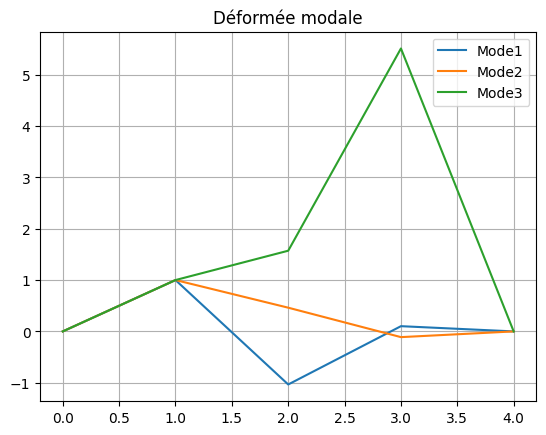

In [43]:
A = modePropre(M, K)
print("Valeurs propres :\n", A[0])
print("\nVecteurs propres :\n", A[1])

DeformeeModale(M, K)

[0.00000000e+00 4.50225113e-01 9.00450225e-01 ... 8.99099550e+02
 8.99549775e+02 9.00000000e+02]



[[0.43224159 0.43224205 0.43224342 ... 0.17442959 0.17416292 0.17389695]
 [0.09605369 0.09605389 0.09605451 ... 0.02175278 0.02168402 0.02161556]
 [0.04802684 0.0480271  0.04802789 ... 0.00090184 0.00089802 0.00089421]]



Objet1 -- Xmax =1191.08763deg en f=613Hz
Objet2 -- Xmax =1231.22088deg en f=613Hz
Objet3 -- Xmax =121.51568deg en f=613Hz


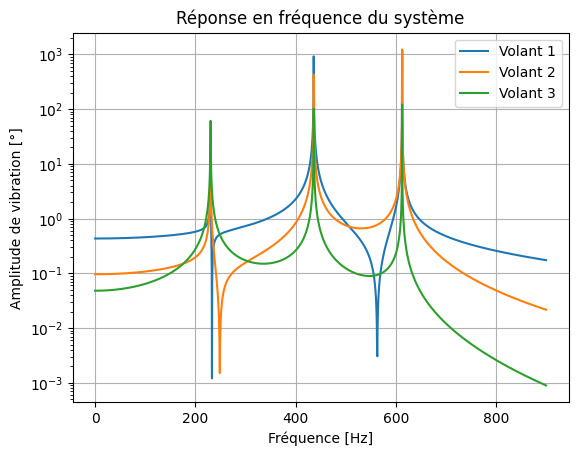

In [44]:
data = repFrequence(M, K, F, 0, 900)
print(data[0])
print("\n\n")
print(data[1])

for i, ln in enumerate(data[1]):
    yplt.plot(data[0], ln, label="Volant "+str(i+1))
yplt.title("Réponse en fréquence du système")
yplt.grid()
yplt.xlabel("Fréquence [Hz]")
yplt.ylabel("Amplitude de vibration [°]")
yplt.legend()

yplt.yscale('log')
#" - max def = " + max(ln)) + " en f="+ str(np.where(ln == max(ln)[0][0])*convPulsFreq)

print("\n\n")
for i, ln in enumerate(data[1]):
    txt = "Objet" + str(i+1) + " -- Xmax ="
    txt += str(round(max(ln),5)) + "deg en f="
    txt += str(round(data[0][np.where(ln == max(ln))[0][0]])) + "Hz"
    print(txt)